In [1]:
from google.colab import files
uploaded = files.upload()


Saving faang_stock_prices.csv to faang_stock_prices.csv


In [3]:
import pandas as pd

df = pd.read_csv("faang_stock_prices.csv")
df.head()

,Date,Ticker,Open,High,Low,Close,Volume,SMA_7,SMA_21,EMA_12,EMA_26,RSI_14,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,Daily_Return,Volatility_7d,Next_Day_Close
0,2016-02-23,AAPL,21.853144,21.875812,21.433763,21.465500,127770400,21.782546,21.682435,21.720115,21.827292,52.112369,-0.107176,-0.149939,22.401531,20.889519,-0.022605,0.018130,21.785145
1,2016-02-23,AMZN,27.777500,27.845501,27.266500,27.646999,81016000,26.675857,27.140333,26.765295,27.363824,50.230010,-0.598529,-0.896261,31.103668,22.908382,-0.011725,0.022486,27.702000
2,2016-02-23,GOOGL,36.032746,36.270944,35.515157,35.595547,41332000,35.747473,36.132564,35.810892,36.019909,28.846871,-0.209017,-0.219158,38.439218,33.798573,-0.016131,0.015153,35.774696
3,2016-02-23,META,106.108789,106.724491,104.390794,104.728432,25319300,103.488525,103.976073,103.607174,102.390311,34.031434,1.216863,1.318966,115.829165,92.886882,-0.015864,0.019720,106.138588
4,2016-02-23,MSFT,46.158514,46.184970,44.959133,45.135513,28895300,45.542440,45.303900,45.301104,45.262960,42.877882,0.038144,-0.096534,48.143898,42.459504,-0.027920,0.019161,45.294239


In [4]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14964 entries, 0 to 14963
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             14964 non-null  object 
 1   Ticker           14964 non-null  object 
 2   Open             14964 non-null  float64
 3   High             14964 non-null  float64
 4   Low              14964 non-null  float64
 5   Close            14964 non-null  float64
 6   Volume           14964 non-null  int64  
 7   SMA_7            14964 non-null  float64
 8   SMA_21           14964 non-null  float64
 9   EMA_12           14964 non-null  float64
 10  EMA_26           14964 non-null  float64
 11  RSI_14           14964 non-null  float64
 12  MACD             14964 non-null  float64
 13  MACD_Signal      14964 non-null  float64
 14  Bollinger_Upper  14964 non-null  float64
 15  Bollinger_Lower  14964 non-null  float64
 16  Daily_Return     14964 non-null  float64
 17  Volatility_7

,0
Date,0
Ticker,0
Open,0
High,0
Low,0
Close,0
Volume,0
SMA_7,0
SMA_21,0
EMA_12,0


In [8]:
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)

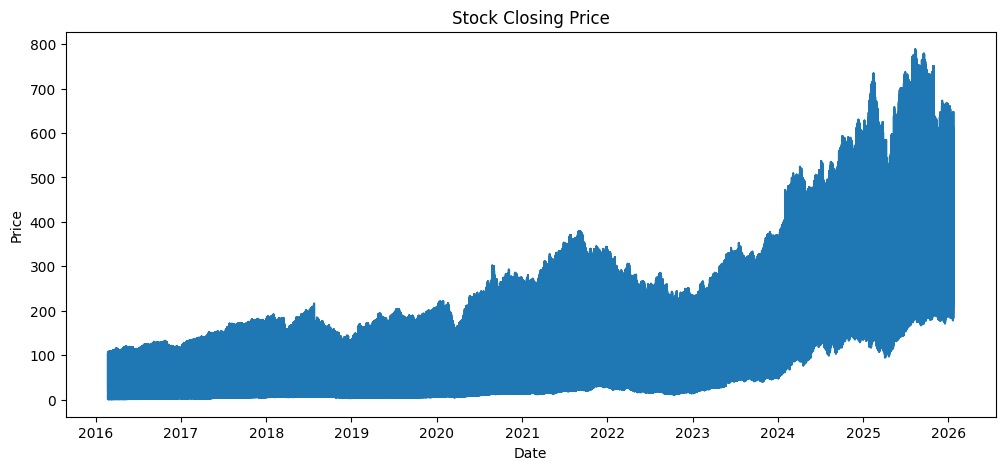

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df['Close'])
plt.title("Stock Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [13]:
forecast_days = 30
df['Prediction'] = df['Close'].shift(-forecast_days)


In [15]:
import numpy as np

X = np.array(df['Close'].dropna())
X = X.reshape(-1, 1)

y = np.array(df['Prediction'].dropna())


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X[:-forecast_days], y, test_size=0.2, random_state=42
)


In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [19]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 72.56543169541283


In [20]:
future_prices = model.predict(X[-forecast_days:])
future_prices


array([259.00266447, 238.94665701, 333.66949993, 622.06347894,
       457.7103613 , 187.7502758 , 256.31919186, 239.88788004,
       330.88589136, 621.512777  , 460.91449812, 186.92920371,
       247.4777244 , 231.75734122, 322.87550347, 605.36182752,
       455.56756787, 178.75861967, 248.4289549 , 232.0677413 ,
       329.2637927 , 614.21333303, 445.14404696, 184.01543673,
       249.12987607, 235.10167449, 331.4266011 , 648.92833444,
       452.18320465, 185.53739942])

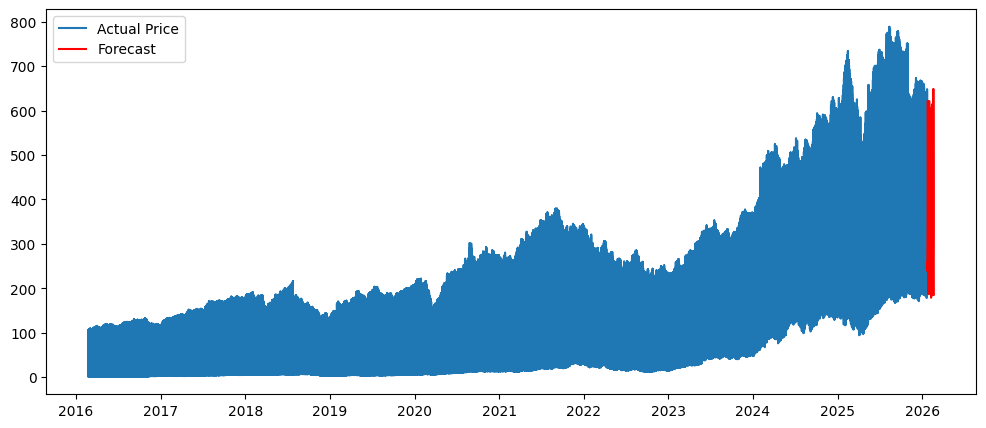

In [21]:
future_dates = pd.date_range(
    start=df.index[-1],
    periods=forecast_days,
    freq='D'
)

plt.figure(figsize=(12,5))
plt.plot(df['Close'], label="Actual Price")
plt.plot(future_dates, future_prices, label="Forecast", color='red')
plt.legend()
plt.show()
